In [1]:
import pickle
from helper_fxns import convert_param_vec_dict_to_param_dict, gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, plot_histograms
from earm.lopez_embedded import model
%matplotlib inline
import os
import numpy as np
from corner import corner
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('/data/lola/shockle/data_for_paper_attempt2/no_pymc')

In [3]:
traces = {}
for trace in ['a', 'b', 'c', 'd']:
    traces[trace] = [np.load('earm_dreamz_3chain_'+str(trace)+'_sampled_params_chain_0.npy')]
    for chain in range(1, 3):
        traces[trace].append(np.load('earm_dreamz_3chain_'+str(trace)+'_sampled_params_chain_'+str(chain)+'.npy'))

In [4]:
logps = {}
for trace in ['a', 'b', 'c', 'd']:
    logps[trace] = [np.load('earm_dreamz_3chain_'+str(trace)+'_logps_chain_0.npy')]
    print 'Logp of trace: ',trace,' chain: 0 = ',logps[trace][-1]
    for chain in range(1, 3):
        logps[trace].append(np.load('earm_dreamz_3chain_'+str(trace)+'_logps_chain_'+str(chain)+'.npy'))
        print 'Logp of trace: ',trace,' chain: ',chain,' = ',logps[trace][-1][-1]

Logp of trace:  a  chain: 0 =  [[-483083.85429753]
 [-483064.07733882]
 [-482862.22367337]
 ..., 
 [  -4953.16178337]
 [  -4953.16178337]
 [  -4953.16178337]]
Logp of trace:  a  chain:  1  =  [-4959.46074275]
Logp of trace:  a  chain:  2  =  [-4961.69012058]
Logp of trace:  b  chain: 0 =  [[-92522.134234  ]
 [-92522.134234  ]
 [-92522.134234  ]
 ..., 
 [ -4959.00780076]
 [ -4959.00780076]
 [ -4959.00780076]]
Logp of trace:  b  chain:  1  =  [-4883.69984]
Logp of trace:  b  chain:  2  =  [-4956.95168465]
Logp of trace:  c  chain: 0 =  [[-821281.64095513]
 [-821281.765518  ]
 [-821281.765518  ]
 ..., 
 [  -4931.1210739 ]
 [  -4931.1210739 ]
 [  -4931.1210739 ]]
Logp of trace:  c  chain:  1  =  [-4975.02935232]
Logp of trace:  c  chain:  2  =  [-4925.54581615]
Logp of trace:  d  chain: 0 =  [[-979757.107758  ]
 [-794903.50507859]
 [-794903.50507859]
 ..., 
 [  -4933.64130663]
 [  -4933.64130663]
 [  -4933.64130663]]
Logp of trace:  d  chain:  1  =  [-4961.09225463]
Logp of trace:  d  chai

In [5]:
from earm_exp_parameters import earm_rates
uni_idx = []
norm_idx = []
uni_n = 0
norm_n = 0
for i, param in enumerate(model.parameters_rules()):
    if earm_rates[param.name]['type'] == 'uniform':
        uni_idx.append(i)
        uni_n += 1
    elif earm_rates[param.name]['type'] == 'normal':
        norm_idx.append(i)
        norm_n += 1

kf mito:  -14.8452186131  -  0.154781386928
kr mito:  -4.15478138693  -  13.8452186131
kf cyto:  -16.0001205731  -  -1.00012057306
kr cyto:  -2.99987942694  -  15.0001205731


In [6]:
traces['b'][0][:,72]

array([ -8.57286359,  -8.57286359,  -8.57286359, ..., -10.11044675,
       -10.11044675, -10.11044675])

In [7]:
traces['a'][0][:,72]

array([-8.12253666, -7.89748079, -7.43043809, ..., -9.01372335,
       -9.01372335, -9.01372335])

In [8]:
param_trace_dicts = {}
param_trace_dict_a = {}
gelman_rubin_dicts = {}
param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]
for run in ['a', 'b', 'c', 'd']:
    uni_param_n = 0
    norm_param_n = uni_n
    for i, param in enumerate(model.parameters_rules()):
        if i in uni_idx:
            param_trace_dict_a[param.name] = [traces[run][chain][:,uni_param_n] for chain in range(len(traces[run]))]
            uni_param_n += 1
        else:
            param_trace_dict_a[param.name] = [traces[run][chain][:,norm_param_n] for chain in range(len(traces[run]))]
            norm_param_n += 1
    param_trace_dicts[run] = param_trace_dict_a
    gelman_rubin_dicts[run] = gelman_rubin_trace_dict(param_trace_dict_a)
    param_trace_dict_a = {}
    param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]

In [9]:
print_convergence_summary(param_trace_dicts['a'])

Number of parameters with GR below 1.2:  104  of  105  parameters.
Percent of parameters with GR below 1.2:  99.0476190476
Number of parameters with GR below 1.1:  101  of  105  parameters.
Percent of parameters with GR below 1.1:  96.1904761905


[104, 99.04761904761905, 101, 96.19047619047619]

In [10]:
print_convergence_summary(param_trace_dicts['b'])

Number of parameters with GR below 1.2:  103  of  105  parameters.
Percent of parameters with GR below 1.2:  98.0952380952
Number of parameters with GR below 1.1:  97  of  105  parameters.
Percent of parameters with GR below 1.1:  92.380952381


[103, 98.09523809523809, 97, 92.38095238095238]

In [11]:
print_convergence_summary(param_trace_dicts['c'])

Number of parameters with GR below 1.2:  88  of  105  parameters.
Percent of parameters with GR below 1.2:  83.8095238095
Number of parameters with GR below 1.1:  71  of  105  parameters.
Percent of parameters with GR below 1.1:  67.619047619


[88, 83.80952380952381, 71, 67.61904761904762]

In [12]:
print_convergence_summary(param_trace_dicts['d'])

Number of parameters with GR below 1.2:  89  of  105  parameters.
Percent of parameters with GR below 1.2:  84.7619047619
Number of parameters with GR below 1.1:  75  of  105  parameters.
Percent of parameters with GR below 1.1:  71.4285714286


[89, 84.76190476190476, 75, 71.42857142857143]

In [13]:
param_trace_dicts['d']['bind_L_R_to_LR_kf']

[array([-6.77612451, -6.97098072, -6.97098072, ..., -9.43147939,
        -9.43147939, -9.43147939]),
 array([-5.79900974, -5.79900974, -6.17962338, ..., -7.62569577,
        -7.62569577, -7.62569577]),
 array([-6.77612451, -6.68530477, -8.74497573, ..., -8.03814673,
        -8.03814673, -8.03814673])]

60000
3
60000


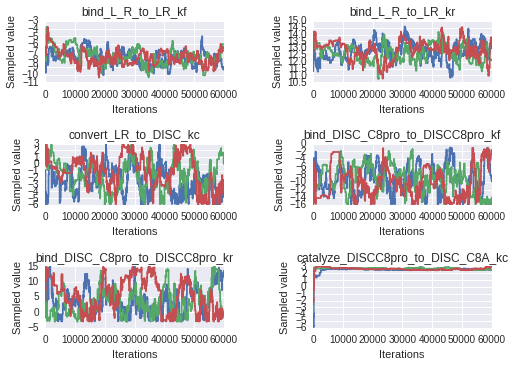

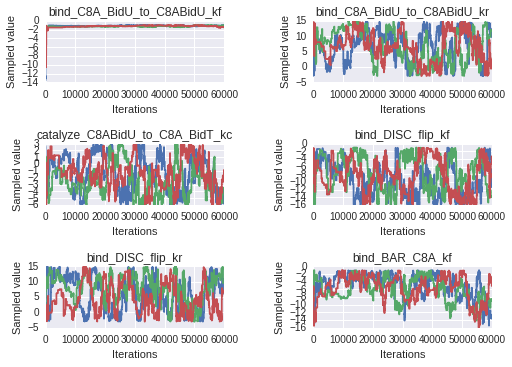

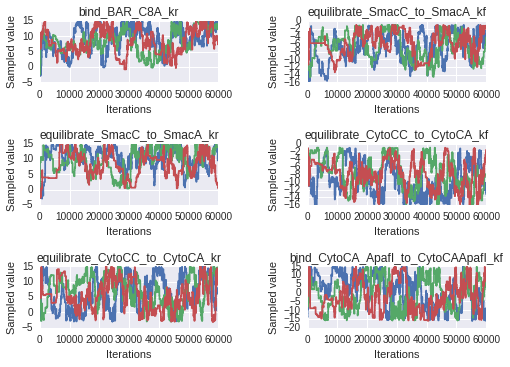

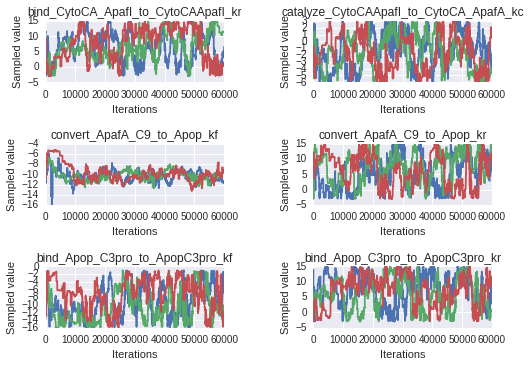

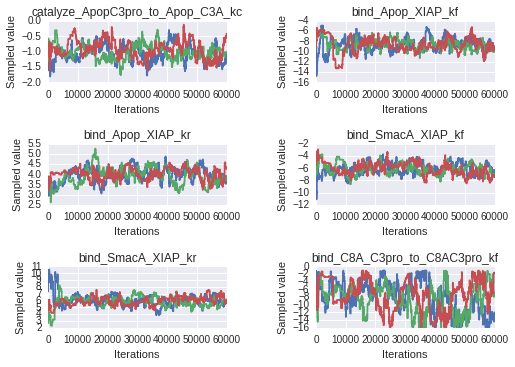

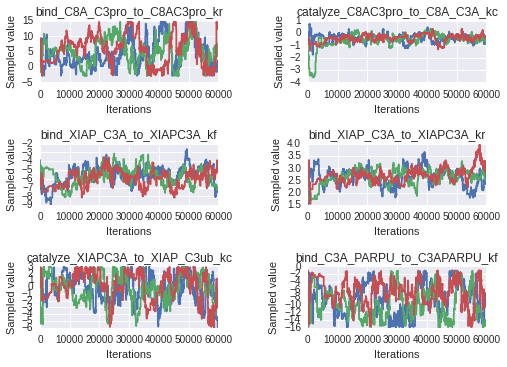

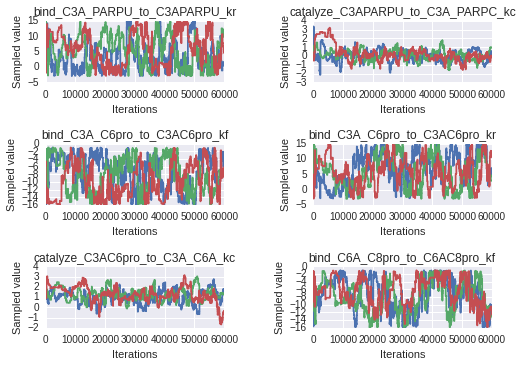

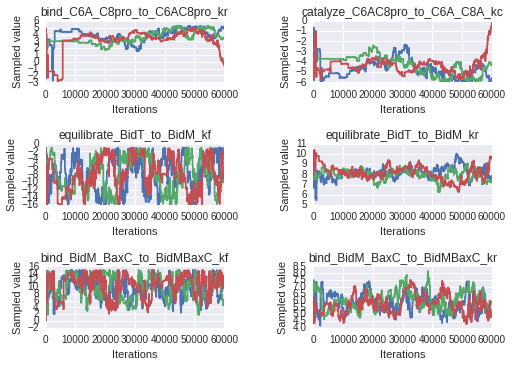

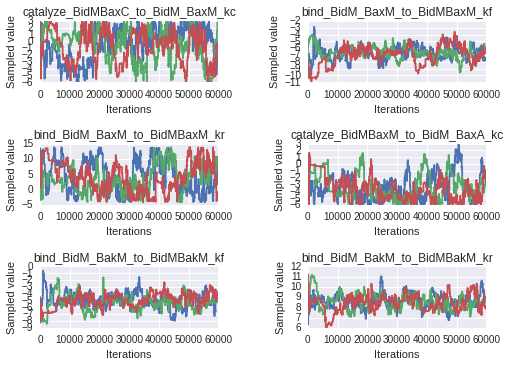

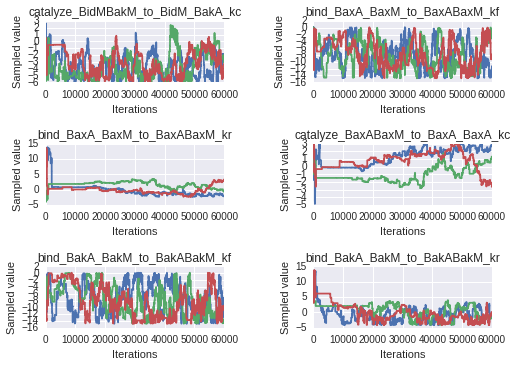

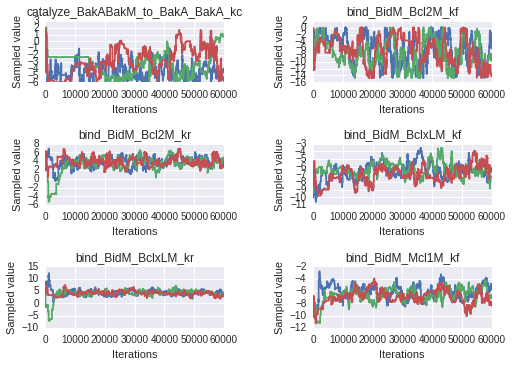

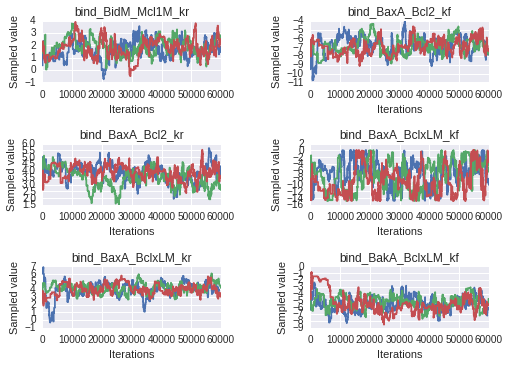

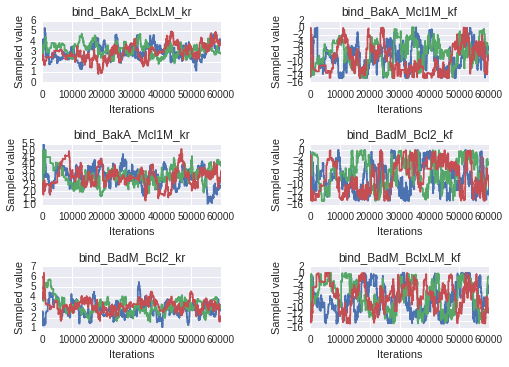

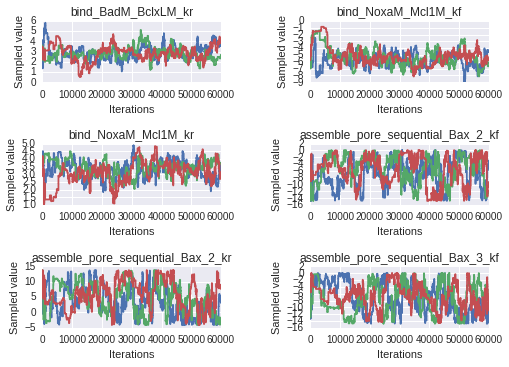

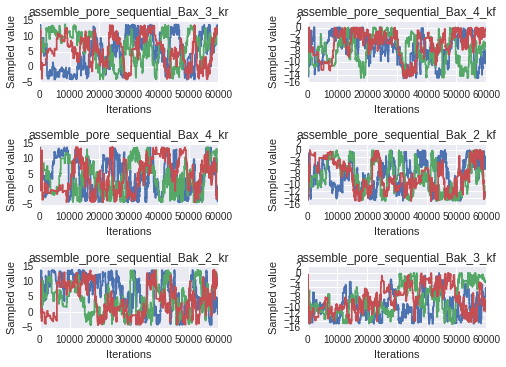

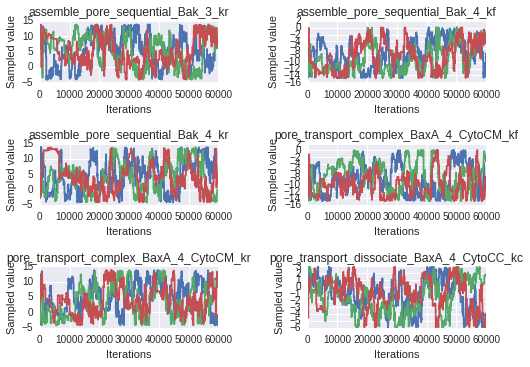

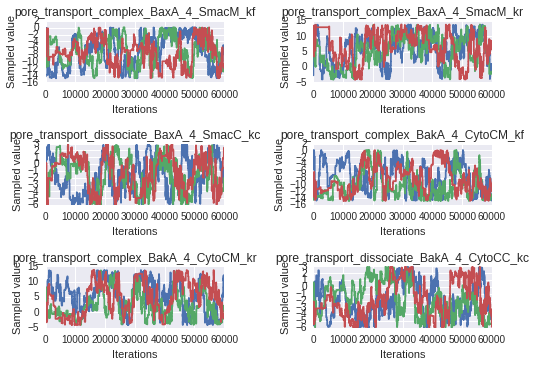

In [ ]:
sample_plots(param_trace_dicts['a'])

In [ ]:
trace_arr_a = create_trace_matrix(param_trace_dicts['a'], burnin=30000)
trace_arr_b = create_trace_matrix(param_trace_dicts['b'], burnin=30000)
trace_arr_c = create_trace_matrix(param_trace_dicts['c'], burnin=30000)
trace_arr_d = create_trace_matrix(param_trace_dicts['d'], burnin=30000)

In [ ]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    sns.plotting_context('notebook')
    ax = sns.distplot(trace_arr_a[:,dim], hist=True)
    sns.distplot(trace_arr_b[:,dim], hist=True)
    sns.distplot(trace_arr_c[:,dim], hist=True)
    sns.distplot(trace_arr_d[:,dim], hist=True)
    if gelman_rubin_dicts['a'][param_name] < 1.2:
        sns.axlabel(param_name+' - '+earm_rates[param_name]['type']+' - converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')
    else:
        sns.axlabel(param_name+' - '+earm_rates[param_name]['type']+' - not converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')
    if earm_rates[param_name]['type'] == 'uniform':
        ax.set_xlim([earm_rates[param_name]['lower'], earm_rates[param_name]['upper']])
    elif 'kf' in param_name:
        ax.set_xlim([-16, -1])
    elif 'kr' in param_name:
        ax.set_xlim([-3, 15])
    elif 'kc' in param_name:
        ax.set_xlim([-6, 3])

In [ ]:
corner(trace_arr_a[:,50:60:], labels=param_trace_dict_a['param_list'][50:60], bins=10)